<h2>Bar charts<h2>

In [2]:
import pandas as pd
import sqlite3

In [3]:
db_con = sqlite3.connect('checking-logs.sqlite.sqlite')

<h3>analyze only the users and not the admins<h3>

In [4]:
sql_query = """
SELECT
    timestamp as datetime
FROM 
    checker
WHERE
    uid LIKE 'user_%'
"""

db = pd.io.sql.read_sql(sql=sql_query, con=db_con, parse_dates=['datetime'])

db['daytype'] = db['datetime'].dt.dayofweek.apply(lambda x: 'weekend' if x > 4 else 'working_day')

new_checker_df = db.groupby(by=[db.daytype, db.datetime.dt.hour, db.datetime.dt.date]).count()
new_checker_df

datetime
daytype     datetime datetime            
weekend     0        2020-04-19         2
                     2020-04-26         2
                     2020-05-10         2
            1        2020-05-10         6
            3        2020-04-25         1
...                                   ...
working_day 22       2020-05-14         8
                     2020-05-20         4
            23       2020-05-11         4
                     2020-05-13         8
                     2020-05-20         3

[288 rows x 1 columns]

In [6]:
df = new_checker_df.rename(columns={'datetime': 'count'})

df = df.groupby(level=['daytype', 'datetime']).mean().swaplevel(i=0, j=1).unstack().droplevel(0, axis='columns')
df.index.name = 'hour'
df.fillna(0, inplace=True)
for hour in range(0, 24):
    if hour not in df.index.values:
        df.loc[hour] = [0, 0]
df.sort_index(inplace=True)
df

daytype,weekend,working_day
hour,,
0,2.000000,3.000000
1,6.000000,0.000000
2,0.000000,0.000000
3,1.000000,2.000000
4,0.000000,0.000000
5,2.000000,7.500000
6,0.000000,1.500000
7,4.000000,5.166667
8,7.000000,3.700000


<h3>create a graph<h3>

array([<AxesSubplot:title={'center':'weekend'}, xlabel='hour'>,
       <AxesSubplot:title={'center':'working_day'}, xlabel='hour'>],
      dtype=object)

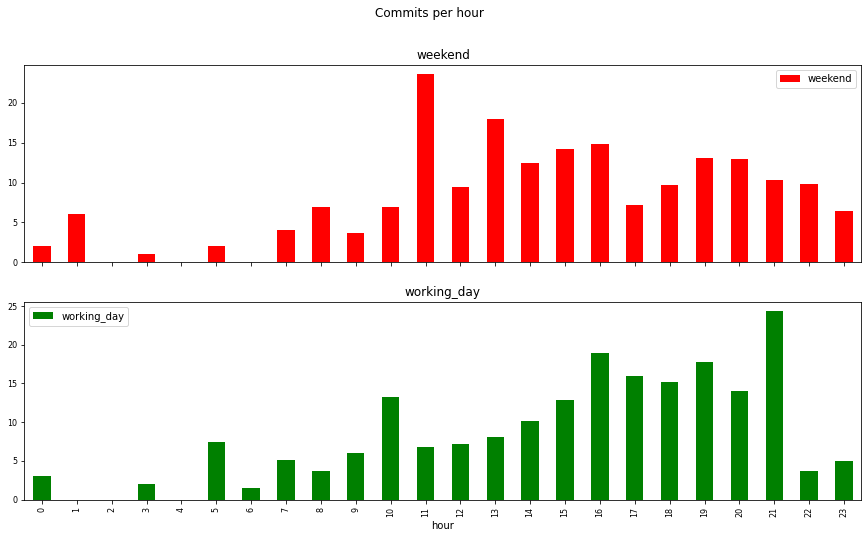

In [7]:
col = {'working_day':'green', 'weekend': 'red'}
df.plot.bar(subplots=True, sharex=True,fontsize=8,figsize=(15,8),title='Commits per hour',rot=90, color=col)

<h3>close the connection to the database<h3>

In [8]:
db_con.close()

<h3>Is the dynamic different on working days and weekends?<h3>

<h3>The answer is 11 hour for weekend and 21 for working_day.<h3>